# RESOLUCIÓN EJERCICIO N° 6

Dado el circuito de la figura, determinar los parámetros h del mismo

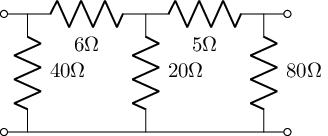

In [28]:
#
import lcapy as ly

circuit=ly.Circuit()

circuit.add("""
W1 _1 _1a ; right=0.2
R1 _1a _2a 40; down, l={$40\Omega$}
W2 _2a _2; left=0.2
R2 _1a _3 6; right, l={$6\Omega$}
R3 _3 _2b 20; down, l={$20\Omega$}
W3 _2b _2a; left
R4 _3 _4 5; right, l={$5\Omega$}
R5 _4 _2c 80; down, l={$80\Omega$}
W4 _2c _2b; left
W5 _4 _5; right=0.2
W6 _2c _2e; right=0.2
""")
circuit.draw()


Los parámetros híbridos "h" surgen del planteo de las siguientes ecuaciones:

$V_1=h_{11}I_1+h_{12}V_2$

$I_2=h_{21}I_1+h_{22}V_2$

Por lo que Podemos calcular los parámetros de la siguiente manera:

$h_{11}=\left.\frac{V_1}{I_1}\right|_{V_2=0}$; $h_{21}=\left.\frac{I_2}{I_1}\right|_{V_2=0}$

$h_{12}=\left.\frac{V_1}{V_2}\right|_{I_1=0}$; $h_{22}=\left.\frac{I_2}{V_2}\right|_{I_1=0}$

Entonces para calcular $h_{11}$ y $h_{21}$ trazaremos el circuito con $V_2=0$ , es decir corocircuitamos el puerto de salida:

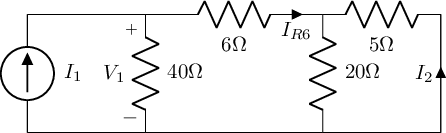

In [14]:
#

circuit2=ly.Circuit()

circuit2.add("""
I1 _1 _2;down
W1 _1 _1a ; right
R1 _1a _2a 40; down, l={$40\Omega$}, v={$V_1$}
W2 _2a _2; left
R2 _1a _3 6; right=1.5, l={$6\Omega$}, i={$I_{R6}$}
R3 _3 _2b 20; down, l={$20\Omega$}
W3 _2b _2a; left
R4 _3 _4 5; right, l={$5\Omega$}
W5 _2c _4; up, i={$I_2$}
W4 _2c _2b; left

""")
circuit2.draw()


Eliminamos la resistencia de $80\Omega$ ya que queda en paralelo con el cortocircuito del puerto 2.

Vemos del circuito que $V_1=I_1\times Z_{eq}$ donde $Z_{eq}$ es la impedancia equivalente vista desde el puerto 1.

Podemos obtener ahora $h_{11}=\left.\frac{V_1}{I_1}\right|_{V_2=0}$  calculando la impedancia equivalente vista del puerto 1.

Primero asociamos las resistencias de $20\Omega$ y la de $5\Omega$ en paralelo resultando en $4\Omega$.
Luego asociamos en serie los $4\Omega$ con la resistencia de $6\Omega$ resultando en $10\Omega$. Po último asociamos en paralelo los $10 \Omega$ con la resistencia de $40\Omega$ y obtenemos

$\boxed{h_{11}=8\Omega}$

Ahora calcularemos $h_{21}$ ya que también se obtiene con el puerto 2 en cortocircuito.
Podemos plantear el divisor de corriente  $I_2=-I_{R6}\times \frac{20\Omega}{20\Omega+5\Omega}=-\frac{4}{5}\times I_{R6}$ (1)

Planteamos ahora la correinte $I_{R6}$ como el divisor de corriente de $I_{1}$ entre la rama de $40\Omega$ y la impedancia equivalente de la otra rama de $10\Omega$ (la calculamos como el serie de los $6\Omega$ con el resultado del paralelo de las impedancias de $5\Omega$ y $20\Omega$)

 $I_{R6}=I_1\times \frac{40\Omega}{40\Omega+10\Omega}=\frac{4}{5}\times I_{1}$ (2)
 
 Reemplazamos (2) en (1) y obtenemos:
 
 $I_2=-\frac{4}{5}\times \frac{4}{5}\times I_{1}=-\frac{16}{25}I_1$
 
 Por lo que $\boxed{h_{21}=\left.\frac{I_2}{I_1}\right|_{V_2=0}=-\frac{16}{25}}$
 

Ya calculamos los dos parámetros que se obtienen haciendo $V_2=0$, ahora calcularemos los parámetros que surgen de hacer $I_1=0$. El circuito con $I_1=0$ queda representado por:

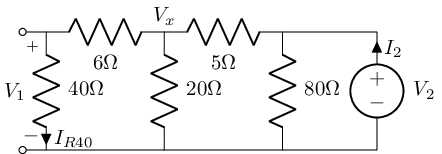

In [26]:
#
import lcapy as ly

circuit3=ly.Circuit()

circuit3.add("""
W1 _1 _1a ; right=0.2
R1 _1a _2a 40; down, l={$40\Omega$}, v={$V_1$}, i={I_{R40}}
W2 _2a _2; left=0.2
R2 _1a _3 6; right, l={$6\Omega$}
R3 _3 _2b 20; down, l={$20\Omega$}
W3 _2b _2a; left
R4 _3 _4 5; right, l={$5\Omega$}
A1 _3 ;l=V_x, anchor=south
R5 _4 _2c 80; down, l={$80\Omega$}
W4 _2c _2b; left
W5 _4 _5; right=0.8
W6 _2c _2e; right=0.8
V2 _5 _2e; down, i={$I_2$}
""")
circuit3.draw()

Podemos obtener $h_{22}=\left.\frac{I_2}{V_2}\right|_{I_1=0}$ calculando la admitancia equivalente vista desde el puerto 2.

$\boxed{h_{22}=65,3mS}$

Por último debemos obtener $h_{12}=\left.\frac{V_1}{V_2}\right|_{I_1=0}$

Para debemos encontrar las ecuaciones que vinculan $V_2$ con $V_1$:

$V_1=V_x\times \frac{40\Omega}{46\Omega}$ (3)



$V_x=\frac{V_2\times 13,94\Omega}{(13,94\Omega+5\Omega)}$ (4)



Los $13,94\Omega$ es el resultado del paralelo de la de $46\Omega$ con $20 \Omega$

Finalmente reemplazando (4) en (3) obtenemos:

$V_1= \frac{40\Omega}{46\Omega} \frac{V_2\times 13,94\Omega}{(13,94\Omega+5\Omega)}$

$\boxed{h_{12}=\left.\frac{V_1}{V_2}\right|_{I_1=0}=0.64}$